# This Notebook will consist of a guide for animating sports data.
For this example, we will be working with data from the 2024 NFL Big Data Bowl, which recently opened!

You can find the submissions from last year's finalists [here](https://operations.nfl.com/gameday/analytics/big-data-bowl/2023-big-data-bowl-finalists/)

**Downloading the Data:** 
1. To get started with the data, you must first create a Kaggle account and join the competition [here] (https://www.kaggle.com/competitions/nfl-big-data-bowl-2024/data). The download button will be all the way at the bottom of the page on the right. Another option if you want to do this all from the command line would be through Kaggle's API, in which you can download with the following command: ```kaggle competitions download -c nfl-big-data-bowl-2024```
2. This will download the data as a zip file. To unzip, start by navigating in your file explorer to wherever you downloaded the zip file, then double-click the file.     
    - If you are working on Mac, this will unzip/extract the file, or use the unzip function in the Terminal
    - If you are working in Windows, you will have to click "Extract All" towards the top of the file explorer.
<br><br>
3. This will create a new folder in the same directory, within which all of the files will be unzipped.

You are now ready to get started working with the data!

In [4]:
# Pandas will be used to read in and work with the data in a dataframe
import pandas as pd

# First, we will read in the data. If there is a play that you want to choose specifically, from last season, try to find it!
week_1 = pd.read_csv("nfl-big-data-bowl-2024/tracking_week_1.csv")

# Here is an example of filtering down to a specific play. Be careful, as some playId's will be the same across different games
play = week_1[week_1['gameId'] == 2022091112][week_1['playId'] == 1613]
play

/tmp/ipykernel_1163231/3368644655.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  play = week_1[week_1['gameId'] == 2022091112][week_1['playId'] == 1613]


,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
1192159,2022091112,1613,38632.0,Kirk Cousins,1,2022-09-11 17:41:58.099999,8.0,MIN,left,53.75,24.010000,0.12,0.36,0.01,286.26,73.78,NaN
1192160,2022091112,1613,38632.0,Kirk Cousins,2,2022-09-11 17:41:58.200000,8.0,MIN,left,53.76,24.010000,0.08,0.53,0.01,284.56,112.54,NaN
1192161,2022091112,1613,38632.0,Kirk Cousins,3,2022-09-11 17:41:58.299999,8.0,MIN,left,53.77,24.000000,0.09,0.66,0.01,283.16,174.65,NaN
1192162,2022091112,1613,38632.0,Kirk Cousins,4,2022-09-11 17:41:58.400000,8.0,MIN,left,53.76,24.000000,0.11,0.58,0.01,281.34,205.27,pass_arrived
1192163,2022091112,1613,38632.0,Kirk Cousins,5,2022-09-11 17:41:58.500000,8.0,MIN,left,53.75,23.990000,0.13,0.51,0.01,279.50,249.13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193327,2022091112,1613,NaN,football,47,2022-09-11 17:42:02.700000,NaN,football,left,10.60,53.470001,5.44,2.92,0.54,NaN,NaN,touchdown
1193328,2022091112,1613,NaN,football,48,2022-09-11 17:42:02.799999,NaN,football,left,10.14,53.669998,4.98,3.78,0.51,NaN,NaN,NaN
1193329,2022091112,1613,NaN,football,49,2022-09-11 17:42:02.900000,NaN,football,left,9.69,53.840000,4.60,3.78,0.48,NaN,NaN,NaN
1193330,2022091112,1613,NaN,football,50,2022-09-11 17:42:03.000000,NaN,football,left,9.35,54.049999,4.00,4.24,0.40,NaN,NaN,NaN


# Plotting
To start with plotting, we will first make a stationary plot for a single frame of a play. From there, we can make it into an animation!

So, we will get the background field as well as a scatter plot of the players.

I will be using sportypy to plot the field here, more documentation can be found on their [GitHub](https://github.com/sportsdataverse/sportypy)

findfont: Font family ['Clarendon-Regular'] not found. Falling back to DejaVu Sans.


<AxesSubplot:>

findfont: Font family ['Clarendon-Regular'] not found. Falling back to DejaVu Sans.


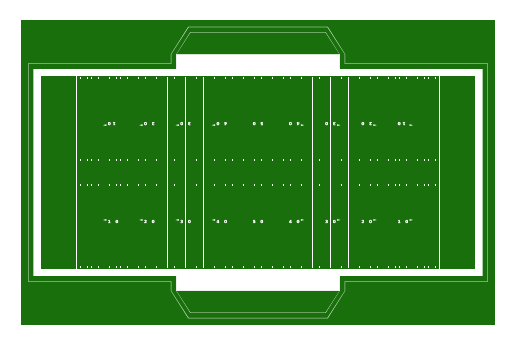

In [5]:
# Import football field
# !pip install sportypy
from sportypy.surfaces.football import NFLField
import matplotlib.pyplot as plt

nfl = NFLField()
# Here, we can see what the blank field looks like:
nfl.draw()

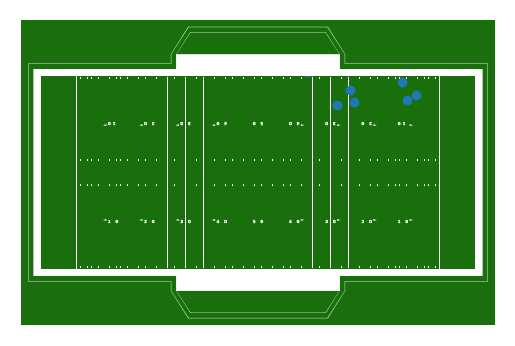

In [6]:
# Now, if we want to add in the players as dots, we can do so with the scatter method, working similarly to matplotlib!
frame_1 = play[play['frameId'] == 1]

fig, ax = plt.subplots(1, 1)
nfl.draw(ax = ax)
nfl.scatter(frame_1['x'], frame_1['y'])

# Something that we will notice is that the points are not centered on the field. This is because the coordinate systems are off.
# Our data has (0, 0) being the bottom left of the left endzone, whereas the field defaults to (0, 0) at the very middle of the field.
# We can fix this with the x_trans and y_trans arguments when we create our nfl variable for the field

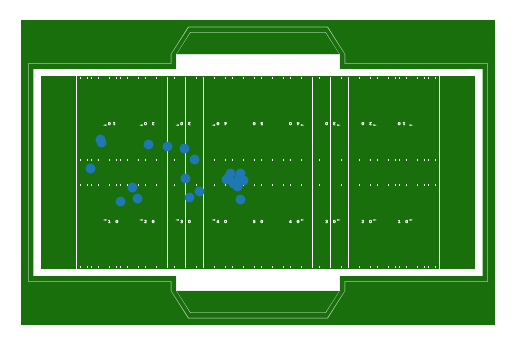

In [7]:
# We know that the field is measured in yards (as described in the docs) and the data source for big data bowl explains: 
    # x: Player position along the long axis of the field, 0 - 120 yards. See Figure 1 below. (numeric)
    # y: Player position along the short axis of the field, 0 - 53.3 yards. See Figure 1 below. (numeric)
length = 120
height = 53.3
nfl = NFLField(x_trans = ????, y_trans = ????) # this will adjust the coordinate plane that the points are plotted on
fig, ax = plt.subplots(1, 1)
nfl.draw(ax = ax)
nfl.scatter(????, ????) # plot the x and y coordinates of each player and the ball

# Animation

For animating the play, we will be using matplotlib's [FuncAnimation](https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.FuncAnimation.html). This function takes the parameters of a matplotlib figure with which to plot on, as well as a different function which you will create to plot each of the frames.

In [41]:
# !sudo apt-get install ffmpeg # this is required for the animation to work

fig, ax = plt.subplots(figsize = (12, 5))
ax.set_axis_off()

def map_frame(frame_num):
    ax.cla() # without this line, the dots will not get removed and the plot will get cluttered with "old" points
    nfl.draw(ax = ax) # once we clear everything from the previous line, we have to re-draw the field
    frame_data = # TODO: filter down to only plot one frame of your play
    return nfl.scatter(????, ????)

from matplotlib.animation import FuncAnimation
from IPython.core.display import HTML

anim = FuncAnimation(fig, map_frame, frames = len(play['frameId'].unique()), interval = 100)
html = anim.to_html5_video()
HTML(html)

# This cell takes a little while! If you're impatient, feel free to add in print statements in the function to see your progress

How does it look? If you stuck with the play I left you, check that it makes sense with the real [footage](https://www.youtube.com/watch?v=Na3ZMuKjBwk)

The job is not done! Our plot still has a lot that can be improved. A couple ideas you can try to fix:
- color code the points by team and highlight the ball
- get rid of all of the extra space on the sidelines, we will never have any data points too far out so it is just wasted space
- zoom in on the play so it is easier to see (these last 2 will need you to look into the sportypy package and build off of what they have to draw out a new field)
- maybe mess around with the sizes of dots to highlight the fastest players
- Anything else you think might make it easier to view and look better!